In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))
from src.models import ModelTrainer

%matplotlib inline

## 2. Load Processed Data
We load `X_train`, `y_train`, etc.

In [2]:
PROCESSED_DIR = '../data/processed'

X_train = pd.read_csv(f'{PROCESSED_DIR}/X_train.csv', index_col=0)
X_test = pd.read_csv(f'{PROCESSED_DIR}/X_test.csv', index_col=0)
y_train = pd.read_csv(f'{PROCESSED_DIR}/y_train.csv', index_col=0).values.ravel()
y_test = pd.read_csv(f'{PROCESSED_DIR}/y_test.csv', index_col=0).values.ravel()

print(f"Training on {X_train.shape[0]} samples and {X_train.shape[1]} genes.")

Training on 147 samples and 990 genes.


## 3. Initialize Trainer
We use our custom `ModelTrainer` class.

In [3]:
trainer = ModelTrainer(X_train, y_train, X_test, y_test)

## 4. Train Models
We train all three models sequentially.

In [4]:
# 1. Linear Regression
trainer.train_baseline()
trainer.evaluate_model('LinearRegression')

# 2. Random Forest
trainer.train_random_forest()
trainer.evaluate_model('RandomForest')

# 3. XGBoost
trainer.train_xgboost()
trainer.evaluate_model('XGBoost')

Training Baseline (Linear Regression)...
Training Random Forest...
Training XGBoost...


{'Train RMSE': np.float64(0.0501740452942701),
 'Test RMSE': np.float64(1.756973346188958),
 'CV RMSE': np.float64(1.919236714481799),
 'Test R2': -0.1773759071194676}

## 5. Compare Performance
We visualize the R2 and RMSE scores.

                    Train RMSE  Test RMSE   CV RMSE   Test R2
LinearRegression  4.379967e-15   1.790931  2.062656 -0.223327
RandomForest      7.361295e-01   1.677023  1.917111 -0.072662
XGBoost           5.017405e-02   1.756973  1.919237 -0.177376


/var/folders/my/jjrp3bfd5g5bdmhr57mjg1n80000gn/T/ipykernel_72217/2213168062.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x=results_df.index, y='Test RMSE', ax=axes[0], palette='viridis')
/var/folders/my/jjrp3bfd5g5bdmhr57mjg1n80000gn/T/ipykernel_72217/2213168062.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x=results_df.index, y='Test R2', ax=axes[1], palette='magma')


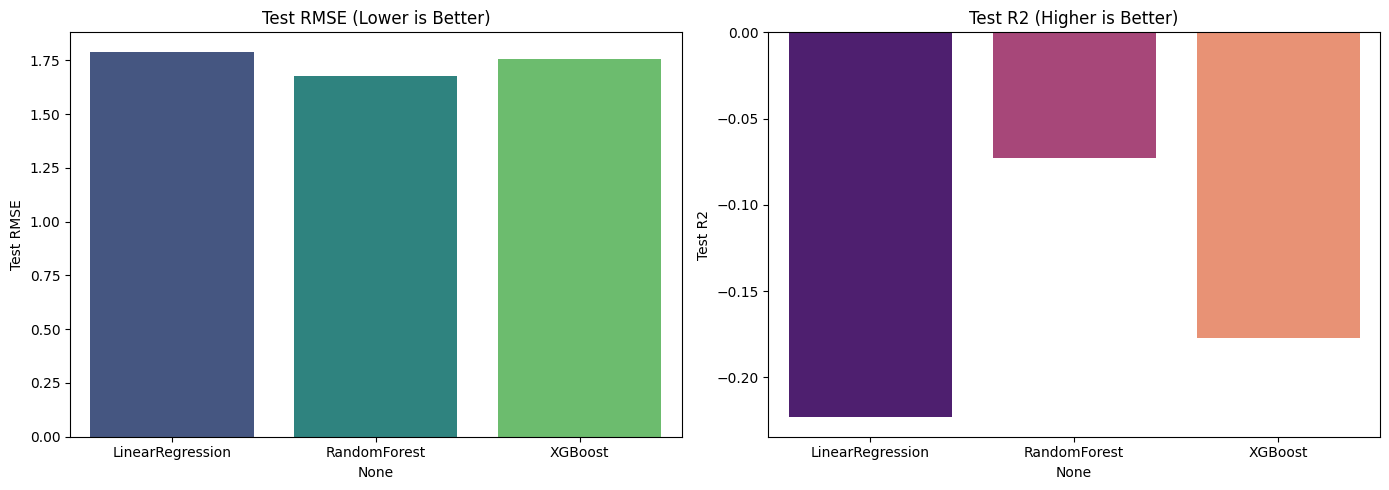

In [6]:
results_df = trainer.get_comparison_table()
print(results_df)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=results_df, x=results_df.index, y='Test RMSE', ax=axes[0], palette='viridis')
axes[0].set_title('Test RMSE (Lower is Better)')

sns.barplot(data=results_df, x=results_df.index, y='Test R2', ax=axes[1], palette='magma')
axes[1].set_title('Test R2 (Higher is Better)')

plt.tight_layout()
plt.show()

## 6. Conclusion
We observe which model performs best. Typically, XGBoost or RF outperforms Linear Regression on high-dimensional biological data due to their ability to capture non-linear interactions between genes.